In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

# Import the dependencies.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path
from pathlib import Path

In [2]:
# Read in the CSV file to play with the data and create machine learning models.

# I've downloaded the CSV file from https://www.basketball-reference.com/leagues/NBA_2014_totals.html
#file_path = Path("2013-14-nba-stats.csv")
file_path = Path("2013-14-nba-stats-edited.csv")

nba_stats_df = pd.read_csv(file_path)
nba_stats_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,Unnamed: 30
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
# Get the number of rows and columns
nba_stats_df.shape

(481, 31)

In [4]:
# Find the average value for each numberic col
nba_stats_df.mean()

Age              26.509356
G                53.253638
GS               25.571726
MP             1237.386694
FG              192.881497
FGA             424.463617
FG%               0.436436
3P               39.613306
3PA             110.130977
3P%               0.285111
2P              153.268191
2PA             314.332640
2P%               0.466947
eFG%              0.480752
FT               91.205821
FTA             120.642412
FT%               0.722419
ORB              55.810811
DRB             162.817048
TRB             218.627859
AST             112.536383
STL              39.280665
BLK              24.103950
TOV              71.862786
PF              105.869023
PTS             516.582121
Unnamed: 30    2013.000000
dtype: float64

In [5]:
# Get the mean / avergae of specific column
nba_stats_df.loc[:, "FG"].mean()

192.88149688149687

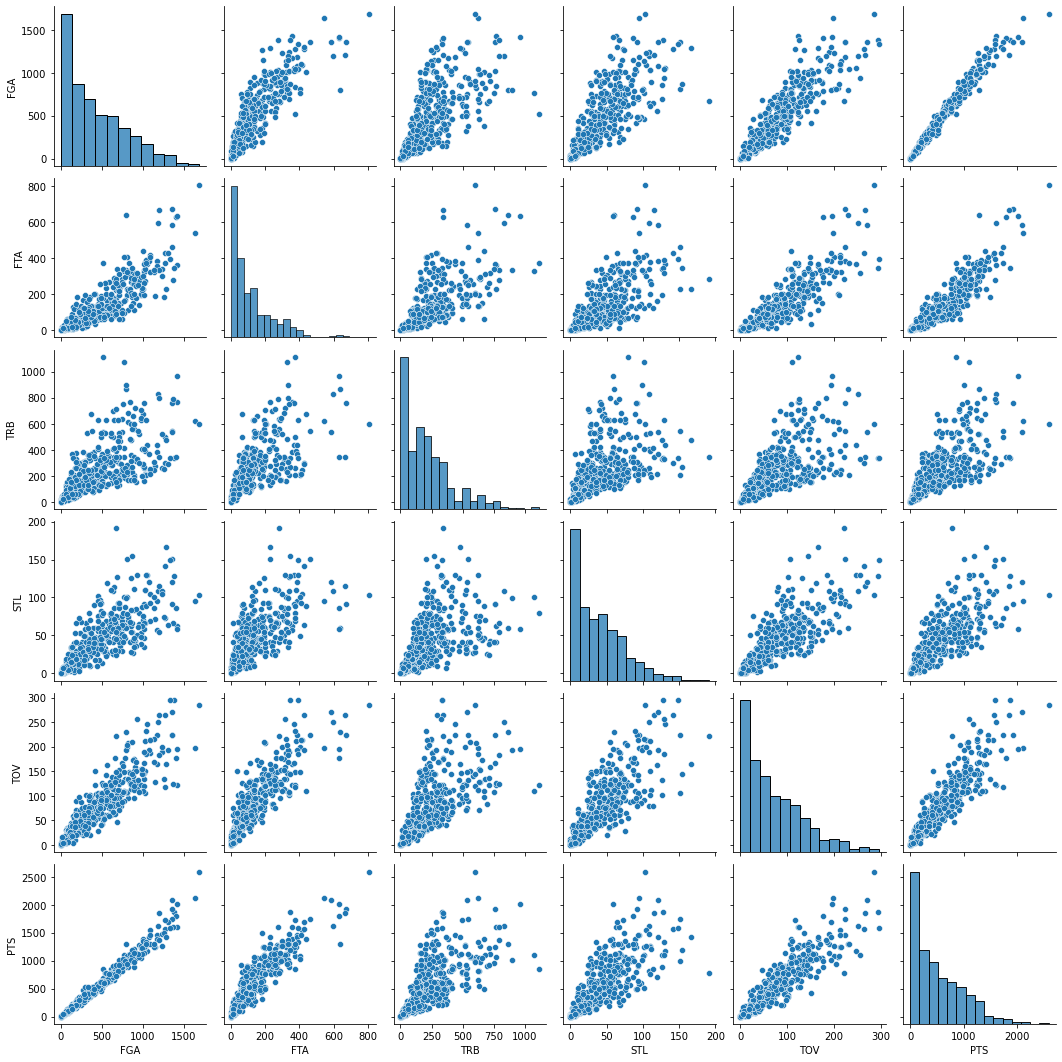

In [6]:
# Make a pairwise scatter plot
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(nba_stats_df[["FGA", "FTA", "TRB", "STL", "TOV", "PTS"]])

<AxesSubplot:>

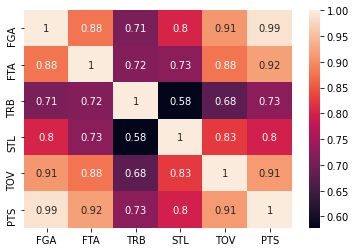

In [7]:
# Make heat map to the correaltions
correlation = nba_stats_df[["FGA", "FTA", "TRB", "STL", "TOV", "PTS"]].corr()
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(correlation, annot=True)

In [8]:
# Make the cluster of players using KMeans
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/modules/clustering.html
from sklearn.cluster import KMeans

# https://scikit-learn.org/stable/modules/clustering.html#k-means
# Creating a KMeans clusters with 6 clusters
kmeans_model = KMeans(n_clusters=6, random_state=42)

In [9]:
# Inspect the data for our model.
# .info()
# .shape
# .dtypes
# .isnull().sum()
# .value_counts(dropna=False) or .value_counts(normalize=True) * 100
# .apply(pd.Series.value_counts)
# .describe().T[["mean", "50%", "std"]].T
# .corr()
# This is not including the visualization charts and graphs!

# Cleaning the data for our model.
# Get numeric data and remove columns with the missing data
clean_columns = nba_stats_df._get_numeric_data().dropna(axis=1)
clean_columns

,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30
0,23,63,0,847,66,141,4,15,62,126,...,72,144,216,28,23,26,30,122,171,2013
1,20,81,20,1197,93,185,0,0,93,185,...,142,190,332,43,40,57,71,203,265,2013
2,27,53,12,961,143,275,0,0,143,275,...,102,204,306,38,24,36,39,108,362,2013
3,28,73,73,2552,464,1011,128,300,336,711,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0,1,136,248,...,94,183,277,40,23,46,63,187,328,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,1765,345,808,40,188,305,620,...,69,159,228,217,78,16,204,151,939,2013
477,28,64,9,1810,387,889,135,350,252,539,...,29,137,166,95,46,12,95,156,1144,2013
478,25,79,78,2718,582,1283,90,292,492,991,...,166,310,476,182,167,36,165,213,1417,2013
479,21,82,3,1416,172,404,0,1,172,403,...,118,235,353,92,40,41,87,170,490,2013


In [10]:
# Train the model 
kmeans_model.fit(clean_columns)
# Get the labels or (cluster label for each player)
labels = kmeans_model.labels_
labels

array([0, 0, 0, 5, 0, 3, 1, 0, 2, 4, 2, 3, 4, 4, 2, 0, 2, 1, 3, 0, 5, 3,
       4, 0, 2, 3, 0, 3, 3, 3, 4, 4, 2, 4, 3, 5, 4, 5, 4, 3, 0, 5, 0, 2,
       0, 4, 3, 3, 0, 4, 4, 2, 4, 3, 3, 4, 0, 4, 5, 5, 2, 4, 5, 3, 4, 3,
       3, 3, 3, 0, 3, 2, 5, 4, 5, 3, 3, 0, 0, 0, 2, 4, 3, 2, 2, 5, 4, 2,
       4, 2, 3, 3, 0, 3, 3, 2, 3, 2, 4, 5, 3, 1, 3, 3, 5, 2, 4, 4, 3, 3,
       1, 4, 3, 3, 0, 5, 0, 4, 3, 3, 3, 4, 5, 1, 2, 0, 0, 0, 1, 5, 4, 5,
       5, 1, 3, 3, 1, 3, 4, 0, 5, 5, 0, 3, 5, 3, 2, 3, 4, 4, 5, 3, 0, 0,
       2, 0, 0, 0, 2, 5, 1, 0, 1, 5, 4, 3, 3, 3, 0, 3, 2, 5, 0, 3, 4, 4,
       5, 1, 0, 1, 3, 0, 3, 0, 2, 1, 2, 3, 0, 0, 3, 3, 3, 2, 0, 5, 0, 5,
       5, 0, 2, 5, 2, 4, 2, 4, 3, 2, 4, 3, 3, 0, 5, 0, 4, 5, 2, 4, 1, 3,
       2, 5, 3, 3, 3, 1, 3, 3, 3, 1, 2, 3, 5, 0, 2, 0, 0, 5, 3, 2, 3, 3,
       0, 3, 2, 5, 0, 0, 5, 3, 4, 4, 0, 5, 2, 4, 3, 3, 0, 4, 3, 3, 5, 3,
       2, 5, 3, 2, 3, 0, 0, 3, 1, 2, 2, 0, 5, 1, 1, 0, 4, 0, 2, 4, 0, 0,
       5, 3, 5, 3, 3, 4, 0, 0, 3, 3, 2, 2, 5, 3, 5,

<AxesSubplot:>

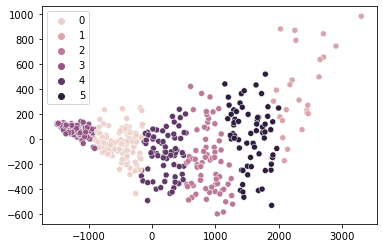

In [11]:
# Plot players by cluster
# Use PCA aka from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca_two_dmnsn = PCA(2)
plot_columns = pca_two_dmnsn.fit_transform(clean_columns)
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(x=plot_columns[:,0], y=plot_columns[:,1], hue=labels, legend="full")

In [12]:
# Find the players from the original dataset and then printing
lebron = clean_columns.loc[nba_stats_df["Player"] == "LeBron James",:]
durant = clean_columns.loc[nba_stats_df["Player"] == "Kevin Durant",:]
wade = clean_columns.loc[nba_stats_df["Player"] == "Dwyane Wade",:]
print(lebron)
print(durant)
print(wade)

     Age   G  GS    MP   FG   FGA   3P  3PA   2P   2PA  ...  ORB  DRB  TRB  \
225   29  77  77  2902  767  1353  116  306  651  1047  ...   81  452  533   

     AST  STL  BLK  TOV   PF   PTS  Unnamed: 30  
225  488  121   26  270  126  2089         2013  

[1 rows x 22 columns]
     Age   G  GS    MP   FG   FGA   3P  3PA   2P   2PA  ...  ORB  DRB  TRB  \
133   25  81  81  3122  849  1688  192  491  657  1197  ...   58  540  598   

     AST  STL  BLK  TOV   PF   PTS  Unnamed: 30  
133  445  103   59  285  174  2593         2013  

[1 rows x 22 columns]
     Age   G  GS    MP   FG  FGA  3P  3PA   2P  2PA  ...  ORB  DRB  TRB  AST  \
448   32  54  53  1775  415  761   9   32  406  729  ...   60  181  241  252   

     STL  BLK  TOV   PF   PTS  Unnamed: 30  
448   79   29  161  106  1028         2013  

[1 rows x 22 columns]


In [14]:
# Converting the data into lists for model prediction
lebron_list = lebron.values.tolist()
durant_list = durant.values.tolist()
wade_list = wade.values.tolist()

# The cluster classification of Lebron James, Kevin Durant, and Dwayne Wade
lebron_cluster = kmeans_model.predict(lebron_list)
durant_cluster = kmeans_model.predict(durant_list)
wade_cluster = kmeans_model.predict(wade_list)

# Print the cluster labels of the predictions
print(lebron_cluster)
print(durant_cluster)
print(wade_cluster)

[1]
[1]
[2]


In [15]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
nba_stats_df.corr()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30
Age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025221,0.050611,0.028850,0.014235,...,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910,NaN
G,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,...,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462,NaN
GS,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,...,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294,NaN
MP,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,...,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464,NaN
FG,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,...,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
FGA,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,...,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN
FG%,0.025221,0.322201,0.234677,0.273682,0.278007,0.211174,1.000000,-0.025510,-0.041720,-0.039424,...,0.423358,0.377067,0.404832,0.068105,0.185385,0.401431,0.221846,0.359125,0.248276,NaN
3P,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,...,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342,NaN
3PA,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,...,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076,NaN
3P%,0.014235,0.103762,0.063468,0.138230,0.110514,0.152111,-0.039424,0.462709,0.449886,1.000000,...,-0.314490,-0.094895,-0.166848,0.212819,0.150476,-0.187411,0.097876,-0.019089,0.144431,NaN


In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Split the data into the training and testing.
X_train, X_test, y_train, y_test = train_test_split(nba_stats_df[["FG"]],
                                                    nba_stats_df[["AST"]], 
                                                    random_state=42)
X_train.shape

(360, 1)

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# Create the Linear Regression Model
lr = LinearRegression()
# Training the linear regression model
lr.fit(X_train, y_train)
# Make predictions on the test data
predictions = lr.predict(X_test)

# Print the predictions
print(predictions)
# Print the actual predictions values
print(y_test)

[[123.69685583]
 [ 24.02283036]
 [ 78.24111894]
 [257.32576909]
 [223.91854077]
 [ 70.57388621]
 [ 16.90325712]
 [181.20110129]
 [ 58.52537764]
 [ 70.57388621]
 [118.7679205 ]
 [ 29.49942517]
 [218.44194597]
 [ 23.47517088]
 [146.15089453]
 [ 21.28453296]
 [135.7453644 ]
 [  8.14070543]
 [133.55472648]
 [170.79557116]
 [ 20.73687348]
 [ 44.83389063]
 [ 30.59474413]
 [103.43345505]
 [237.61002779]
 [ 67.83558881]
 [240.89598467]
 [ 37.71431738]
 [ 65.09729141]
 [ 43.19091218]
 [  7.59304595]
 [ 15.80793816]
 [121.50621791]
 [271.56491558]
 [ 23.47517088]
 [155.4611057 ]
 [154.36578674]
 [ 21.83219244]
 [ 37.71431738]
 [ 13.61730023]
 [ 15.26027868]
 [307.7104413 ]
 [  7.04538647]
 [163.67599791]
 [ 45.92920959]
 [  8.68836491]
 [  7.04538647]
 [ 15.26027868]
 [ 71.66920517]
 [  8.68836491]
 [ 48.66750699]
 [160.39004103]
 [ 18.54623556]
 [101.24281712]
 [  9.23602439]
 [ 84.26537323]
 [ 24.02283036]
 [330.71213948]
 [  8.68836491]
 [ 25.66580881]
 [ 83.71771375]
 [146.69855401]
 [107.81

In [20]:
# Test model
# Get the score returns the coefficient of determination R^2 fo the prediction
lr_confidence = lr.score(X_test, y_test)
print(f"lr condidence: {lr_confidence}")

lr condidence: 0.5640471901087801
